In [1]:
import numpy as np
import matplotlib.pyplot as plt

import opticalglass.buchdahl as buchdahl
from opticalglass.glassfactory import create_glass
from opticalglass import hoya

# Build Multi-Index for Hoya

In [2]:
catalog = 'Hoya'
gname = 'FCD1'
gname1 = 'E-F2'
gname2 = 'MC-TAF1'

In [3]:
cat_pd = hoya.HoyaCatalog()
cat_df = cat_pd.df

In [4]:
cat_df

category      Code refractive index abbe number refractive index abbe number  \
data item      NaN                d          vd                e          ve   
glass                                                                          
FC5        487-704          1.48749       70.45          1.48914       70.24   
FCD1       497-816            1.497       81.61          1.49845       81.19   
FCD1B      497-816           1.4971       81.56          1.49856       81.15   
FCD10A     459-902           1.4586        90.2          1.45981       89.75   
FCD100     437-951            1.437        95.1           1.4381       94.66   
...            ...              ...         ...              ...         ...   
M-NBF1     743-493           1.7433       49.33          1.74689       49.07   
MP-NBF1    743-493           1.7433       49.33          1.74689       49.07   
MC-NBF1    743-493           1.7433       49.33          1.74689       49.07   
M-TAF1     773-495           1.7725       49.47          1.77622        49.2   
MC-TAF1    773-495           1.7725       49.47          1.77622        49.2   

category  refractive indices                                      ...  \
data item             1529.6  1128.64        t        s       A'  ...   
glass                                                             ...   
FC5                  1.47308  1.47774  1.47913  1.48139  1.48283  ...   
FCD1                 1.48598  1.48907  1.49008  1.49182    1.493  ...   
FCD1B                1.48592  1.48912  1.49015  1.49192   1.4931  ...   
FCD10A               1.44937  1.45194  1.45279  1.45426  1.45525  ...   
FCD100               1.42855  1.43094  1.43172  1.43306  1.43396  ...   
...                      ...      ...      ...      ...      ...  ...   
M-NBF1               1.71791  1.72466  1.72693  1.73091  1.73367  ...   
MP-NBF1              1.71791  1.72466  1.72693  1.73091  1.73367  ...   
MC-NBF1              1.71791  1.72466  1.72693  1.73091  1.73367  ...   
M-TAF1               1.74719   1.7535  1.75571  1.75972  1.76254  ...   
MC-TAF1              1.74719   1.7535  1.75571  1.75972  1.76254  ...   

category  internal transmission mm, 10                                     \
data item                        340.0  330.0  320.0  310.0  300.0  290.0   
glass                                                                       
FC5                              0.984   0.97  0.937  0.868   0.71   0.43   
FCD1                             0.878  0.761  0.586  0.376   0.19  0.077   
FCD1B                            0.726   0.52  0.288  0.112  0.028    0.0   
FCD10A                           0.867  0.744  0.561  0.347  0.166  0.059   
FCD100                            0.88  0.761  0.579  0.358  0.168  0.057   
...                                ...    ...    ...    ...    ...    ...   
M-NBF1                           0.757  0.648  0.521  0.327   0.25  0.132   
MP-NBF1                          0.757  0.648  0.521  0.327   0.25  0.132   
MC-NBF1                          0.852  0.775  0.677  0.486  0.451  0.341   
M-TAF1                           0.731  0.598  0.446  0.202  0.184  0.116   
MC-TAF1                          0.731  0.598  0.446  0.202  0.184  0.116   

category         Glass Cross Reference Index Remarks    Update  
data item  280.0                         NaN     NaN       NaN  
glass                                                           
FC5         0.12                       N-FK5    <NA>  20170401  
FCD1       0.027                     N-PK52A    <NA>  20181012  
FCD1B        0.0                     N-PK52A    <NA>  20181012  
FCD10A     0.016                        <NA>    <NA>  20170401  
FCD100     0.015                        <NA>    <NA>  20170401  
...          ...                         ...     ...       ...  
M-NBF1     0.032                        <NA>    <NA>  20170401  
MP-NBF1    0.032                        <NA>    <NA>  20170401  
MC-NBF1     0.17                        <NA>    <NA>  20170401

In [5]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [6]:
cat_df.columns.has_duplicates

False

In [7]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [8]:
coefs /= np.array((nd - 1.0), dtype=float)

## Test Series extracted from DataFrame

In [9]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname1]

In [10]:
cat_df.loc[gname]['dispersion coefficients']

data item
A0       2.218113
A0pow           0
A1      -5.799427
A1pow          -3
A2       8.347068
A2pow          -3
A3       6.504652
A3pow          -5
A4       8.514219
A4pow          -6
A5      -5.885227
A5pow          -7
Name: FCD1, dtype: object

In [11]:
gla['dispersion coefficients']

data item
A0       2.218113
A0pow           0
A1      -5.799427
A1pow          -3
A2       8.347068
A2pow          -3
A3       6.504652
A3pow          -5
A4       8.514219
A4pow          -6
A5      -5.885227
A5pow          -7
Name: FCD1, dtype: object

In [12]:
coefs = gla['dispersion coefficients'].to_numpy(dtype=float)

In [13]:
coefs

array([ 2.2181132,  0.       , -5.799427 , -3.       ,  8.3470679,
       -3.       ,  6.5046523, -5.       ,  8.5142186, -6.       ,
       -5.8852269, -7.       ])

In [14]:
coefs[3]

-3.0

In [15]:
cat_pd.glass_data(gname)['internal transmission mm, 10']

data item
2500      0.999
2400.0    0.999
2200.0    0.999
2000.0    0.999
1800.0    0.999
1600.0    0.999
1550.0    0.999
1500.0    0.999
1400.0    0.999
1300.0    0.999
1200.0    0.999
1100      0.999
1060.0    0.999
1050.0    0.999
1000.0    0.999
950.0     0.999
900.0     0.999
850.0     0.999
830.0     0.999
800.0     0.999
780.0     0.999
750.0     0.999
700       0.999
650.0     0.998
600.0     0.999
550.0     0.999
500.0     0.999
480.0     0.999
460.0     0.997
440.0     0.997
420.0     0.997
400.0     0.995
390.0     0.996
380       0.995
370.0      0.99
360.0     0.972
350.0     0.939
340.0     0.878
330.0     0.761
320.0     0.586
310.0     0.376
300.0      0.19
290.0     0.077
280.0     0.027
Name: FCD1, dtype: object

In [16]:
cat_pd.glass_data(gname)['refractive indices']

data item
1529.6     1.48598
1128.64    1.48907
t          1.49008
s          1.49182
A'           1.493
r          1.49408
C          1.49514
C'         1.49543
He-Ne      1.49571
D          1.49694
d            1.497
e          1.49845
F          1.50123
F'         1.50157
g          1.50451
h          1.50721
i          1.51175
Name: FCD1, dtype: object

## Test factory method, create_glass

In [17]:
gla2 = create_glass(gname2, catalog)

In [18]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index([ 1529.6, 1128.64,     't',     's',    'A'',     'r',     'C',    'C'',
       'He-Ne',     'D',     'd',     'e',     'F',    'F'',     'g',     'h',
           'i'],
      dtype='object', name='data item')

In [19]:
print(" wvl     meas n   interp n    delta")
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{str(w_str):7s} {n_line:8.5f}  {n_intrp:8.5f}  {n_intrp-n_line:8.2g}')

 wvl     meas n   interp n    delta
1529.6   1.74719   1.74719  -1.3e-06
1128.64  1.75350   1.75350  -4.9e-06
t        1.75571   1.75571   2.4e-06
s        1.75972   1.75972   3.9e-06
A'       1.76254   1.76254   3.4e-06
r        1.76517   1.76517  -4.4e-06
C        1.76781   1.76781  -3.7e-06
C'       1.76855   1.76855  -4.8e-07
He-Ne    1.76925   1.76925  -4.5e-06
D        1.77236   1.77236   4.1e-06
d        1.77250   1.77250   2.5e-06
e        1.77622   1.77622   1.9e-06
F        1.78342   1.78342   3.6e-06
F'       1.78433   1.78433  -4.2e-06
g        1.79208   1.79208  -4.9e-06
h        1.79932   1.79932  -3.3e-07
i        1.81179   1.81179   3.1e-06


In [20]:
wvls[0]

1529.6

In [21]:
gla2.meas_rindex(wvls).array

<PandasArray>
[1.74719,  1.7535, 1.75571, 1.75972, 1.76254, 1.76517, 1.76781, 1.76855,
 1.76925, 1.77236,  1.7725, 1.77622, 1.78342, 1.78433, 1.79208, 1.79932,
 1.81179]
Length: 17, dtype: object

In [22]:
gla2.rindex(wvls)

array([1.74718868, 1.7534951 , 1.75571244, 1.75972388, 1.76254343,
       1.76516562, 1.76780629, 1.76854952, 1.7692455 , 1.77236409,
       1.77250249, 1.77622193, 1.78342357, 1.78432577, 1.79207506,
       1.79931967, 1.8117931 ])

In [23]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<PandasArray>
[ 1.3172371233771685e-06,  4.8984895388848315e-06,  -2.444966360704015e-06,
 -3.8784501823485584e-06, -3.4280279030962646e-06,   4.382355534904292e-06,
  3.7054882224829555e-06,   4.828140127699498e-07,   4.497910835343788e-06,
  -4.091701971464801e-06,  -2.485744281299773e-06, -1.9335056840041887e-06,
  -3.567562498307808e-06,   4.229042122938509e-06,   4.943051643557794e-06,
   3.271234316759575e-07, -3.0971265490009614e-06]
Length: 17, dtype: object

In [24]:
cat_pd.glass_data(gname)['specific gravity']

data item
d    3.7
Name: FCD1, dtype: object

In [25]:
cat_pd.glass_data(gname)['chemical properties']

data item
DW          2
DA          3
Tblue       4
DNaOH       5
DSTPP       5
D0          5
DH       <NA>
Name: FCD1, dtype: object

In [26]:
cat_pd.glass_data(gname)['thermal properties']

data item
Tg           457
Ts           490
T1014.5      439
T1013        450
T107.6       560
λ          0.837
Ｃｐ         0.636
Name: FCD1, dtype: object

In [27]:
cat_pd.glass_data(gname)['mechanical properties']

data item
HK         345
HKrank       3
FA         410
E           80
G         31.1
μ         0.28
σb          48
Name: FCD1, dtype: object

In [28]:
cat_df.loc[[gname, gname1]]['mechanical properties']['HK']

glass
FCD1    345
E-F2    530
Name: HK, dtype: Int64

In [29]:
cat_pd.glass_data(gname1)['internal transmission mm, 10']

data item
2500       <NA>
2400.0     <NA>
2200.0     <NA>
2000.0     <NA>
1800.0     <NA>
1600.0     <NA>
1550.0    0.995
1500.0    0.995
1400.0    0.993
1300.0    0.999
1200.0    0.999
1100      0.999
1060.0    0.998
1050.0    0.998
1000.0    0.998
950.0     0.998
900.0     0.998
850.0     0.998
830.0     0.998
800.0     0.998
780.0     0.998
750.0     0.998
700       0.994
650.0     0.993
600.0     0.995
550.0     0.995
500.0     0.989
480.0     0.985
460.0     0.982
440.0     0.981
420.0     0.974
400.0     0.952
390.0      0.91
380       0.802
370.0     0.542
360.0     0.147
350.0       0.0
340.0       0.0
330.0       0.0
320.0       0.0
310.0       0.0
300.0       0.0
290.0       0.0
280.0       0.0
Name: E-F2, dtype: object

In [30]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[1.48749,   1.497,  1.4971,  1.4586,   1.437, 1.59282,  1.5941, 1.55032,
   1.618, 1.61997,
 ...
  1.7133, 1.92286, 1.92286, 1.73077, 1.73077,  1.7433,  1.7433,  1.7433,
  1.7725,  1.7725]
Length: 194, dtype: Float64

In [31]:
trnsm_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T

<AxesSubplot:xlabel='data item'>

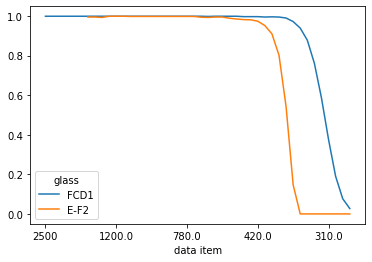

In [32]:
trnsm_data.plot()

<AxesSubplot:xlabel='data item'>

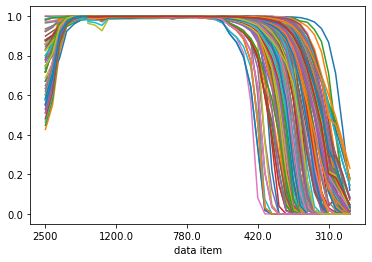

In [33]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [34]:
gla_v2 = hoya.HoyaGlass(gname)

In [35]:
gla_v2.meas_rindex('F')

1.50123

In [36]:
gla_v2.glass_code()

'497.816'

In [37]:
gla_v2.glass_data()['refractive indices']

data item
1529.6     1.48598
1128.64    1.48907
t          1.49008
s          1.49182
A'           1.493
r          1.49408
C          1.49514
C'         1.49543
He-Ne      1.49571
D          1.49694
d            1.497
e          1.49845
F          1.50123
F'         1.50157
g          1.50451
h          1.50721
i          1.51175
Name: FCD1, dtype: object

In [38]:
cat_pd.glass_data(gname)[1:30]

category                 data item
refractive index         d               1.497
abbe number              vd              81.61
refractive index         e             1.49845
abbe number              ve              81.19
refractive indices       1529.6        1.48598
                         1128.64       1.48907
                         t             1.49008
                         s             1.49182
                         A'              1.493
                         r             1.49408
                         C             1.49514
                         C'            1.49543
                         He-Ne         1.49571
                         D             1.49694
                         d               1.497
                         e             1.49845
                         F             1.50123
                         F'            1.50157
                         g             1.50451
                         h             1.50721
                         